# Titanic Kaggle Competition Predictions

**Importing the libraries**

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Importing the data**

In [48]:
training_set = pd.read_csv('/kaggle/input/titanic/train.csv')
test_set = pd.read_csv('/kaggle/input/titanic/test.csv')

**Data exploration**

In [49]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Survival rate PClass

[1 2 3]
Survival rate classes: 
[0.63, 0.47, 0.24]


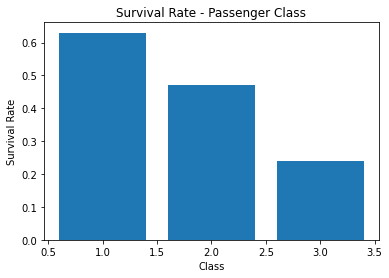

In [51]:
classes = training_set.Pclass.unique()
classes.sort()
survival_rate_classes = []
# .loc - get rows by the name of a column

for i in classes:
    class_i = training_set.loc[training_set.Pclass == i]["Survived"]
    survival_rate_classes.append(round(sum(class_i)/len(class_i),2))

print(classes)
print('Survival rate classes: ')
print(survival_rate_classes)


plt.bar(classes, survival_rate_classes)
plt.title("Survival Rate - Passenger Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

2. Survival rate per Sex

Survival rates: 
[0.19, 0.74]


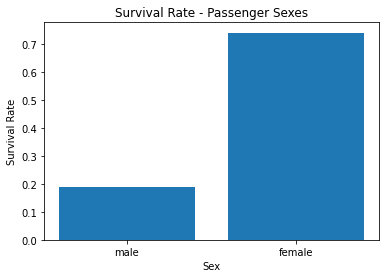

In [52]:
sex = training_set.Sex.unique()
survival_rate_sex = []

for i in sex:
    sex_i = training_set.loc[training_set.Sex == i]["Survived"]
    survival_rate_sex.append(round(sum(sex_i)/len(sex_i),2))
    
print('Survival rates: ')
print(survival_rate)

plt.bar(sex, survival_rate_sex)
plt.title("Survival Rate - Passenger Sexes")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

3. Survival rate per Age bucket

In [53]:
max_age = max(training_set.Age)
training_set["AgeGroup"] = pd.cut(round(training_set.Age), bins = 5, labels=["1", "2", "3", "4", "5"], ordered = True)
print('Age categories: ')
age_categories = training_set.AgeGroup.unique()

survival_rate_age = []

for i in range(1,6):
    cat = training_set.loc[training_set.AgeGroup == str(i)]["Survived"]
    survival_rate_age.append(round(sum(cat)/len(cat),2))
    print(i)
    print(survival_rate_age)

Age categories: 
1
[0.55]
2
[0.55, 0.37]
3
[0.55, 0.37, 0.4]
4
[0.55, 0.37, 0.4, 0.43]
5
[0.55, 0.37, 0.4, 0.43, 0.09]


4. Survival rate by # of siblings / spouses aboard the Titanic

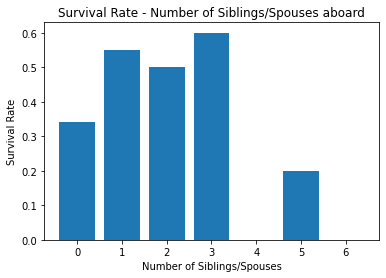

In [54]:
sibsp_categories = []
sibsp_categories = training_set.Parch.unique()
sibsp_categories.sort()

survival_rate_sibsp = []

for i in sibsp_categories:
    cat = training_set.loc[training_set.Parch == i]["Survived"]
    survival_rate_sibsp.append(round(sum(cat)/len(cat),2))

plt.bar(sibsp_categories, survival_rate_sibsp)
plt.title("Survival Rate - Number of Siblings/Spouses aboard")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")
plt.show()

5. Survival rate by # of parents / children aboard the Titanic

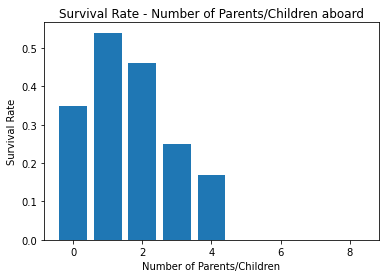

In [55]:
parch_categories = []
parch_categories = training_set.SibSp.unique()
parch_categories.sort()

survival_rate_parch = []

for i in parch_categories:
    cat = training_set.loc[training_set.SibSp == i]["Survived"]
    survival_rate_parch.append(round(sum(cat)/len(cat),2))

plt.bar(parch_categories, survival_rate_parch)
plt.title("Survival Rate - Number of Parents/Children aboard")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Survival Rate")
plt.show()

6. Fare

In [70]:
# Fare - feature scaling

7. Port of Embarkation